# **Breast Cancer Dataset Assignment**



---



In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
#-------------------------------------------------------------------#
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE, titleweight='bold')     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE, labelweight='bold')    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#-------------------------------------------------------------------#

In [82]:
# load_breast_cancer return a Bunch object
# which is similar to a dictionary
cancer = load_breast_cancer()

In [83]:
# dataset description
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [84]:
# to access the data, use:
cancer.data;
# to access feature_names
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [85]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [86]:
# extracting number of features
n_features=len(cancer['feature_names'])
print(f"The dataset contains {n_features} features.")
# verifying number of positives (benign)
n_positives=np.sum(cancer['target']==1)
print(f"Number of + (benign) classes: {n_positives}")
# verifying number of negatives (malign)
n_negatives=np.sum(cancer['target']==0)
print(f"Number of - (malign) classes: {n_negatives}")

The dataset contains 30 features.
Number of + (benign) classes: 357
Number of - (malign) classes: 212


In [87]:
# convert cancer dataset to a dataframe
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)
df.shape

(569, 31)

In [88]:
# split the dataframe into X and y
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [102]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1)

In [103]:
# fit a 1KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [104]:
# predict the class label using 
# the mean value for each feature
mean=df.mean()[:-1].values.reshape(1, -1)
predict=knn.predict(mean)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [105]:
# prediction on X_test
predicted=knn.predict(X_test)
#evaluate accuracy
accuracy=knn.score(X_test,y_test)

In [106]:
def accuracy_plot(X_train, X_test, y_train, y_test,knn):
    import matplotlib.pyplot as plt
    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]

    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

# **Classification Metrics**

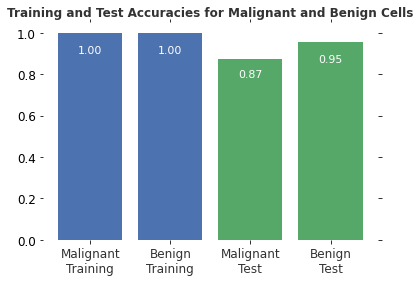

In [107]:
accuracy_plot(X_train, X_test, y_train, y_test,knn)

In [108]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score
confusion_matrix(y_test,predicted)

array([[48,  7],
       [ 4, 84]])

In [109]:
precision_score(y_test,predicted)

0.9230769230769231

In [110]:
recall_score(y_test,predicted)

0.9545454545454546

In [111]:
f1_score(y_test,predicted)

0.9385474860335197

Text(0.5, 1.0, 'AUC=0.91')

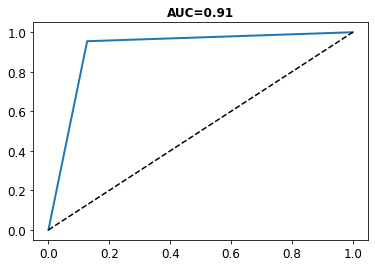

In [112]:
import matplotlib.pyplot as plt
fpr,tpr,thresh=roc_curve(y_test,predicted)
auc=roc_auc_score(y_test,predicted)
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.title(f"AUC={np.round(auc,2)}")

# **Evaluation of different "k" and "f1-score"**

Text(0, 0.5, 'AUC')

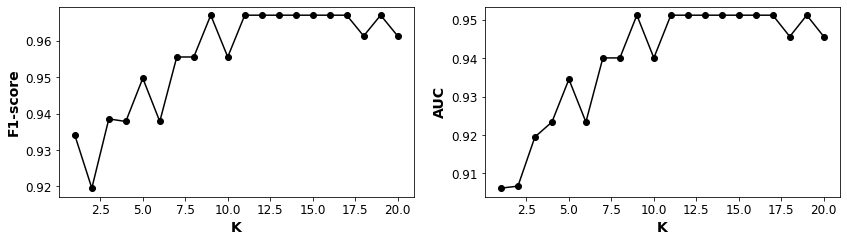

In [134]:
# first with seed=0 for train-test split
k_list=range(1,21)
f1=[]
auc=[]
for k in k_list:
  X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  predicted=knn.predict(X_test)
  f1.append(f1_score(y_test,predicted))
  auc.append(roc_auc_score(y_test,predicted))

labels=['f1','auc']
subplots=(121,122)
plt.figure(figsize=(14,3.5))
plt.subplot(121)
plt.plot(k_list,f1,'ko-')
plt.xlabel("K")
plt.ylabel("F1-score")
plt.subplot(122)
plt.plot(k_list,auc,'ko-')
plt.xlabel("K")
plt.ylabel("AUC")

Text(0, 0.5, 'AUC')

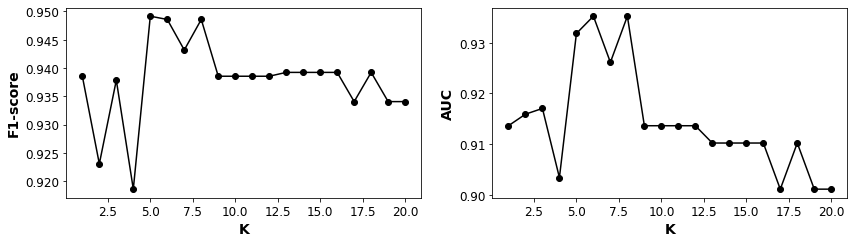

In [135]:
# Now with seed=1 for train-test split
k_list=range(1,21)
f1=[]
auc=[]
for k in k_list:
  X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1)
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  predicted=knn.predict(X_test)
  f1.append(f1_score(y_test,predicted))
  auc.append(roc_auc_score(y_test,predicted))

labels=['f1','auc']
subplots=(121,122)
plt.figure(figsize=(14,3.5))
plt.subplot(121)
plt.plot(k_list,f1,'ko-')
plt.xlabel("K")
plt.ylabel("F1-score")
plt.subplot(122)
plt.plot(k_list,auc,'ko-')
plt.xlabel("K")
plt.ylabel("AUC")

However, we know train-test split is an extremely biased estimator for the generalization error.

We apply **Nested K-Fold Cross Validation**, where the inner loop searches for the best hyperparameters using GridSearchCV (with 3-folds), and the outer loop yields an estimate for the generalization error.

The outer loop contains 5-folds and we report the F1 for each fold, as well as the average F1. The average F1 can be deemed as the generalization error estimate.

In [132]:
from sklearn.model_selection import cross_val_score,cross_val_predict, GridSearchCV,train_test_split,KFold
# define hyper-param grids
grid = {'n_neighbors':[1,5,10,15,20,25,30]}
# inner 3-fold loop for hyper-params selection
cv_inner =  KFold(n_splits=3, shuffle=True, random_state=0)
# outer 5-fold loop for generalization error 
cv_outer = KFold(5, shuffle=True,random_state= 0)
# invoke knn
model=KNeighborsClassifier()
# invoke grid-search CV
gscv= GridSearchCV(estimator=model,
                  param_grid = grid,
                  cv=cv_inner,
                  scoring='f1',
                  verbose=0,
                  n_jobs=-1,
                  refit=True)
# estimate generalization error
scores=cross_val_score(gscv, X,y,cv=cv_outer,scoring='f1',n_jobs=-1);
print(f"Mean F1 score={np.mean(scores)}")
print(f"STD F1 score={np.std(scores)}")

Mean F1 score=0.9485399193898483
STD F1 score=0.023128866404677345


In [136]:
# obtain best model
grid_result = gscv.fit(X,y)
best_params = grid_result.best_params_
best_params

{'n_neighbors': 20}